In [1]:
# Importing all the required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading a dataset
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# First 5 rows and columns
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# Getting some information about the data
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Categorical Features --> Sex,Smoker,Region

#Checking for the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Data Analysis

# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\NEW\AppData\Local\Temp\ipykernel_2064\2113199472.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


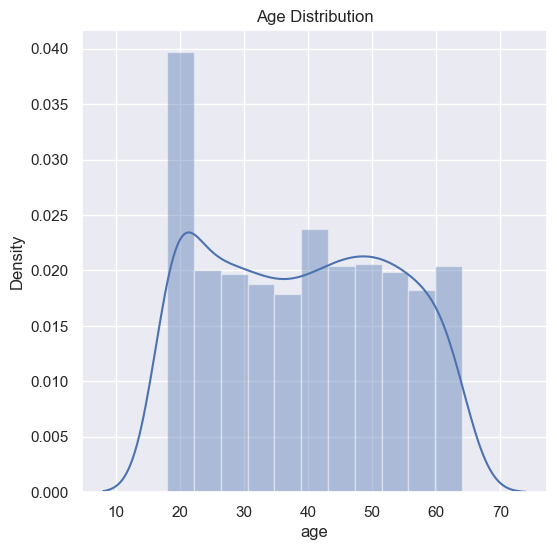

In [8]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

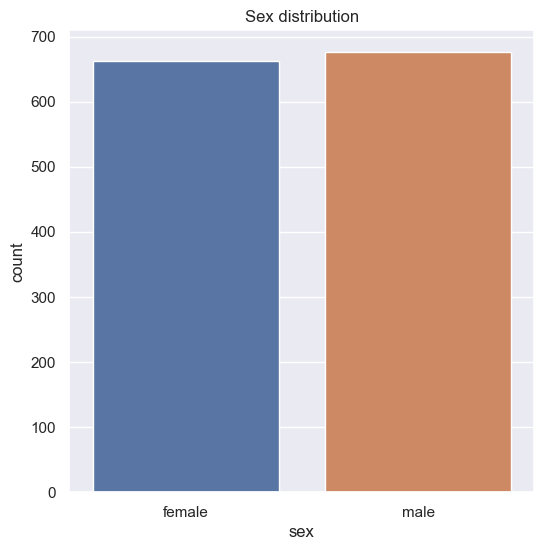

In [9]:
# Gender column
plt.figure(figsize = (6,6))
plt.title("Sex distribution")
sns.countplot(x = 'sex', data = insurance_dataset)
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\NEW\AppData\Local\Temp\ipykernel_2064\995989934.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


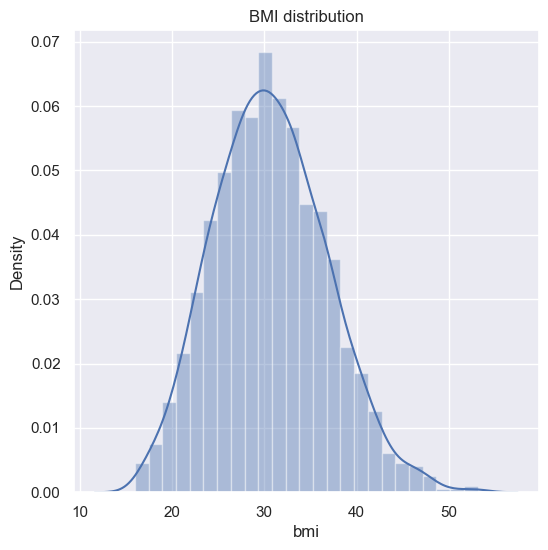

In [11]:
# BMI distribution
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

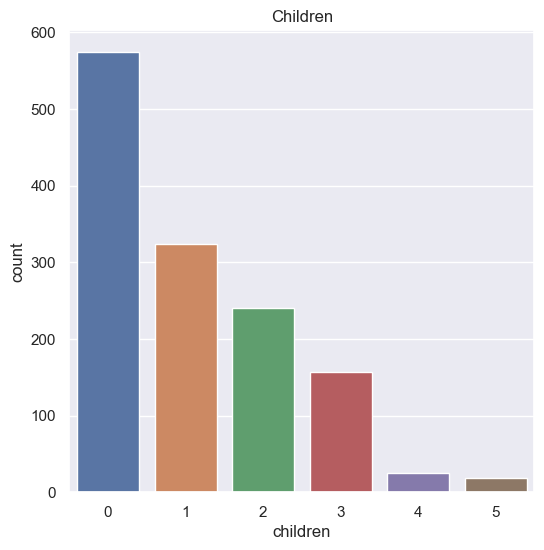

In [12]:
# Children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children',data = insurance_dataset)
plt.title("Children")
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

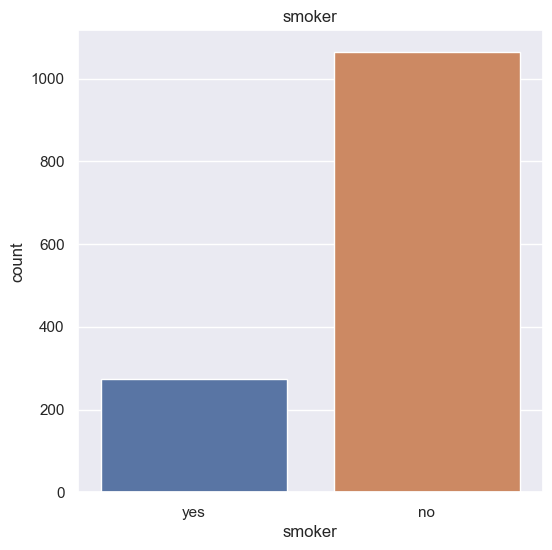

In [14]:
# Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker',data = insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

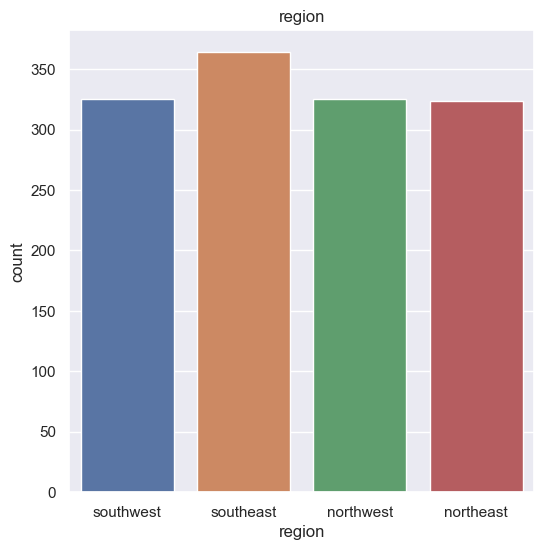

In [16]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region',data = insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\NEW\AppData\Local\Temp\ipykernel_2064\4116074225.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


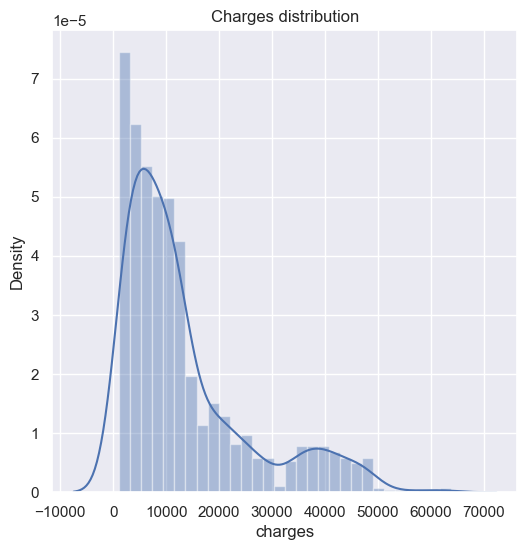

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges distribution')
plt.show()

In [19]:
# Data pre-processing

# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace= True)

# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)

# encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [20]:
# Spliting the features and target
x = insurance_dataset.drop(columns = 'charges',axis = 1)
y = insurance_dataset['charges']

In [21]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [22]:
# Model traning
# Linear Regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
# Model Evaluation
# prediction on training data
y_pred = reg.predict(x_train)

In [24]:
# R squared value
r2 = metrics.r2_score(y_train,y_pred)
print("R squared value: ",r2)

R squared value:  0.751505643411174


In [25]:
# prediction on test data
test_data_pred = reg.predict(x_test)
r2 = metrics.r2_score(y_test,test_data_pred)
print("R squared value: ",r2)

R squared value:  0.7447273869684077


In [26]:
# Building a Predictive system
input_data = (31,1,25.74,0,1,0)
input_data = np.array(input_data).reshape(1,-1)
prediction = reg.predict(input_data)
print('The insurance cost is USD = ',prediction[0])

The insurance cost is USD =  3760.0805764960587


D:\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
